In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

C:\Users\Neeladri\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


##### Loading the Datasets

In [2]:
d_train=pd.read_csv('competition-train.csv')
d_test=pd.read_csv('competition-test.csv')

In [3]:
d_train.shape

(10714, 28)

In [4]:
d_train.head(1)

,people_ID,Region,Gender,Designation,Name,Married,Children,Occupation,Mode_transport,cases/1M,...,HBB,d-dimer,Heart rate,HDL cholesterol,Charlson Index,Blood Glucose,Insurance,salary,FT/month,Infect_Prob
0,1,Bhubaneshwar,Female,Mrs,mansi,YES,1.0,Farmer,Public,2,...,93.0,233.0,82.0,58.0,27,7,3600000.0,1300000,2.0,49.13501


In [5]:
d_train.tail(10)

,people_ID,Region,Gender,Designation,Name,Married,Children,Occupation,Mode_transport,cases/1M,...,HBB,d-dimer,Heart rate,HDL cholesterol,Charlson Index,Blood Glucose,Insurance,salary,FT/month,Infect_Prob
10704,22686,Bengaluru,Male,Mr,hawa singh,YES,2.0,Researcher,Walk,8,...,72.0,307.0,60.0,58.0,35,4,4400000.0,700000,0.0,59.594744
10705,22687,Bengaluru,Male,Mr,mukesh,YES,2.0,Manufacturing,Public,8,...,98.0,226.0,89.0,39.0,13,7,3400000.0,900000,1.0,59.374719
10706,22688,Bengaluru,Male,Mr,sanjay singh,YES,2.0,Clerk,Public,8,...,77.0,258.0,67.0,63.0,1,4,4900000.0,1900000,2.0,58.798970
10707,22689,Bengaluru,Male,Mr,ankit @ lala,NO,NaN,Legal,Car,8,...,33.0,271.0,67.0,68.0,38,3,NaN,1100000,2.0,30.265920
10708,22690,Bengaluru,Male,Mr,manoj kumar,YES,1.0,Farmer,Public,8,...,150.0,337.0,69.0,44.0,31,3,3300000.0,1400000,2.0,53.741750
10709,22691,Bengaluru,Male,Mr,ashish,NO,2.0,Business,Car,8,...,24.0,209.0,61.0,56.0,35,7,4000000.0,300000,0.0,41.981760
10710,22692,Bengaluru,Male,Mr,mohd mujahid ansari,YES,0.0,Manufacturing,Car,8,...,134.0,211.0,65.0,47.0,35,7,1500000.0,700000,NaN,47.148663
10711,22693,Bengaluru,Male,Mr,munnakumar,YES,0.0,Clerk,Public,8,...,151.0,296.0,87.0,37.0,16,5,3000000.0,2100000,2.0,47.708533
10712,22694,Bengaluru,Male,Mr,prakash,YES,1.0,Legal,Walk,8,...,110.0,253.0,56.0,70.0,28,5,2900000.0,700000,1.0,53.803565
10713,22695,Bengaluru,Male,Mr,mehboob mehandi,NO,2.0,Business,Car,8,...,134.0,201.0,82.0,60.0,4,3,2100000.0,1400000,0.0,68.342400


In [6]:
d_train.columns.values

array(['people_ID', 'Region', 'Gender', 'Designation', 'Name', 'Married',
       'Children', 'Occupation', 'Mode_transport', 'cases/1M',
       'Deaths/1M', 'comorbidity', 'Age', 'Coma score', 'Pulmonary score',
       'cardiological pressure', 'Diuresis', 'Platelets', 'HBB',
       'd-dimer', 'Heart rate', 'HDL cholesterol', 'Charlson Index',
       'Blood Glucose', 'Insurance', 'salary', 'FT/month', 'Infect_Prob'],
      dtype=object)

In [61]:
d_train=d_train.drop('Infect_Prob',axis=1)
d_train.cov()

,people_ID,Children,cases/1M,Deaths/1M,Age,Coma score,Diuresis,Platelets,HBB,d-dimer,Heart rate,HDL cholesterol,Charlson Index,Blood Glucose,Insurance,salary,FT/month
people_ID,5.053310e+07,102.641881,8341.354274,2755.953930,-310.691284,126.942861,1.938391e+04,-1049.730191,3436.837243,-2.652698e+03,1496.519999,1433.877974,913.894985,51.033987,9.713381e+07,6.146848e+07,7.257653
Children,1.026419e+02,0.669488,0.022928,0.015552,-0.626094,0.078320,-9.559149e-01,0.812307,0.451248,1.468748e-01,0.055155,-0.051913,-0.189370,0.010911,-6.486952e+03,-9.354094e+03,0.003147
cases/1M,8.341354e+03,0.022928,7.405332,2.295091,0.151457,-0.137219,8.156323e+00,0.851232,0.907688,2.321472e-01,0.583547,0.147467,-0.033796,-0.017085,5.068696e+04,1.471695e+04,0.001622
Deaths/1M,2.755954e+03,0.015552,2.295091,0.729834,0.052241,-0.032694,2.480169e+00,0.336641,0.490564,8.613376e-03,0.149788,0.069196,-0.018248,-0.006557,1.489518e+04,4.198296e+03,0.001171
Age,-3.106913e+02,-0.626094,0.151457,0.052241,234.806488,-0.149045,-8.634655e+00,7.742209,11.728150,-5.012045e+00,0.901529,-0.647766,0.526071,0.270281,-2.929654e+05,-2.700718e+04,0.204736
Coma score,1.269429e+02,0.078320,-0.137219,-0.032694,-0.149045,13.801005,1.124737e+00,-2.215177,1.399632,1.020718e-01,-0.391029,0.279284,-0.231021,0.085027,-4.756265e+04,9.758248e+03,0.004462
Diuresis,1.938391e+04,-0.955915,8.156323,2.480169,-8.634655,1.124737,9.601163e+03,39.287499,21.292165,-4.075984e+01,-10.624792,11.428117,16.648392,-1.506648,3.206246e+06,-4.135131e+05,-1.329379
Platelets,-1.049730e+03,0.812307,0.851232,0.336641,7.742209,-2.215177,3.928750e+01,1751.514846,-18.570765,2.602148e+01,-4.533031,-9.162810,-0.171432,0.595173,1.103069e+05,-2.749479e+05,0.464920
HBB,3.436837e+03,0.451248,0.907688,0.490564,11.728150,1.399632,2.129217e+01,-18.570765,3044.701159,-1.581470e+01,-0.051957,2.480636,3.662088,-0.422985,-1.152743e+05,-3.644552e+05,-0.536197
d-dimer,-2.652698e+03,0.146875,0.232147,0.008613,-5.012045,0.102072,-4.075984e+01,26.021479,-15.814699,1.907042e+03,-4.974455,-0.993001,0.598487,-0.179829,1.025497e+06,4.008632e+04,-0.472284


In [7]:
data_train=d_train.copy()
data_test=d_test.copy()

In [8]:
d_train.describe()

,people_ID,Children,cases/1M,Deaths/1M,Age,Coma score,Diuresis,Platelets,HBB,d-dimer,Heart rate,HDL cholesterol,Charlson Index,Blood Glucose,Insurance,salary,FT/month,Infect_Prob
count,10714.000000,10403.000000,10714.000000,10714.000000,10714.000000,10714.000000,9998.000000,9790.000000,10698.000000,9600.000000,9600.000000,10679.000000,10714.000000,10714.000000,9.624000e+03,1.071400e+04,9991.000000,10714.000000
mean,10084.893784,1.062770,3.285888,0.523241,42.083722,9.013067,278.806261,87.795812,116.170967,275.292292,74.847396,52.632737,20.028094,5.015027,2.644919e+06,1.304713e+06,1.004604,52.280680
std,7108.663645,0.818222,2.721274,0.854303,15.323397,3.714970,97.985526,41.851103,55.178811,43.669692,14.869104,10.434293,11.828445,1.399770,1.383346e+06,6.075947e+05,0.815257,10.674667
min,1.000000,0.000000,1.000000,0.000000,16.000000,3.000000,110.000000,15.000000,20.000000,200.000000,50.000000,35.000000,0.000000,3.000000,3.000000e+05,3.000000e+05,0.000000,29.289600
25%,2679.250000,0.000000,2.000000,0.000000,29.000000,6.000000,194.000000,52.000000,68.000000,237.000000,62.000000,44.000000,10.000000,4.000000,1.400000e+06,8.000000e+05,0.000000,47.277426
50%,10003.500000,1.000000,2.000000,0.000000,42.000000,9.000000,276.000000,88.000000,117.000000,276.000000,75.000000,53.000000,20.000000,5.000000,2.600000e+06,1.300000e+06,1.000000,49.008389
75%,15141.750000,2.000000,4.000000,1.000000,55.000000,12.000000,364.000000,124.000000,165.000000,313.000000,88.000000,62.000000,30.000000,6.000000,3.800000e+06,1.800000e+06,2.000000,52.762313
max,22695.000000,2.000000,8.000000,2.000000,68.000000,15.000000,450.000000,160.000000,210.000000,350.000000,100.000000,70.000000,40.000000,7.000000,5.000000e+06,2.300000e+06,2.000000,97.632000


#### Removing the columns which are not required 

In [9]:
data_train=data_train.drop('Designation',axis=1)
data_train=data_train.drop('Name',axis=1)
data_train=data_train.drop('Insurance',axis=1)
data_train=data_train.drop('salary',axis=1)

In [10]:
data_test=data_test.drop('Designation',axis=1)
data_test=data_test.drop('Name',axis=1)
data_test=data_test.drop('Insurance',axis=1)
data_test=data_test.drop('salary',axis=1)

In [11]:
data_train.head()

,people_ID,Region,Gender,Married,Children,Occupation,Mode_transport,cases/1M,Deaths/1M,comorbidity,...,Diuresis,Platelets,HBB,d-dimer,Heart rate,HDL cholesterol,Charlson Index,Blood Glucose,FT/month,Infect_Prob
0,1,Bhubaneshwar,Female,YES,1.0,Farmer,Public,2,0,Hypertension,...,441.0,154.0,93.0,233.0,82.0,58.0,27,7,2.0,49.135010
1,2,Bhubaneshwar,Female,YES,2.0,Farmer,Walk,2,0,Diabetes,...,NaN,121.0,56.0,328.0,89.0,68.0,5,6,1.0,51.147880
2,3,Bhubaneshwar,Female,NO,1.0,Cleaner,Public,2,0,None,...,416.0,124.0,137.0,213.0,77.0,43.0,40,6,1.0,73.224000
3,4,Bhubaneshwar,Female,YES,1.0,Driver,Car,2,0,Coronary Heart Disease,...,410.0,98.0,167.0,275.0,64.0,60.0,27,7,1.0,48.779225
4,5,Bhubaneshwar,Female,NO,2.0,Manufacturing,Car,2,0,Diabetes,...,390.0,21.0,153.0,331.0,71.0,64.0,32,7,1.0,87.868800


In [12]:
data_test.head()

,people_ID,Region,Gender,Married,Children,Occupation,Mode_transport,cases/1M,Deaths/1M,comorbidity,...,cardiological pressure,Diuresis,Platelets,HBB,d-dimer,Heart rate,HDL cholesterol,Charlson Index,Blood Glucose,FT/month
0,5942,Delhi,Female,YES,2,Driver,Public,4,1,Diabetes,...,Stage-01,388,153,196,240,85,53,17,3,1
1,18664,Delhi,Male,YES,2,Legal,Walk,4,1,Diabetes,...,Stage-01,409,95,138,241,81,61,2,5,1
2,5603,Delhi,Female,YES,2,Sales,Car,4,1,Diabetes,...,Stage-02,440,40,166,236,88,47,24,3,2
3,5649,Delhi,Female,YES,2,Sales,Car,4,1,None,...,Elevated,206,78,83,211,87,52,13,6,2
4,5099,Delhi,Female,YES,2,Business,Car,4,1,Diabetes,...,Stage-01,229,109,207,312,94,68,39,5,1


In [13]:
data_train.describe(include='all')

,people_ID,Region,Gender,Married,Children,Occupation,Mode_transport,cases/1M,Deaths/1M,comorbidity,...,Diuresis,Platelets,HBB,d-dimer,Heart rate,HDL cholesterol,Charlson Index,Blood Glucose,FT/month,Infect_Prob
count,10714.000000,10714,10714,10714,10403.000000,9967,10711,10714.000000,10714.000000,10488,...,9998.000000,9790.000000,10698.000000,9600.000000,9600.000000,10679.000000,10714.000000,10714.000000,9991.000000,10714.000000
unique,NaN,5,2,2,NaN,9,3,NaN,NaN,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Chennai,Female,YES,NaN,Legal,Public,NaN,NaN,Hypertension,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,2581,5423,8481,NaN,1174,3588,NaN,NaN,2642,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,10084.893784,NaN,NaN,NaN,1.062770,NaN,NaN,3.285888,0.523241,NaN,...,278.806261,87.795812,116.170967,275.292292,74.847396,52.632737,20.028094,5.015027,1.004604,52.280680
std,7108.663645,NaN,NaN,NaN,0.818222,NaN,NaN,2.721274,0.854303,NaN,...,97.985526,41.851103,55.178811,43.669692,14.869104,10.434293,11.828445,1.399770,0.815257,10.674667
min,1.000000,NaN,NaN,NaN,0.000000,NaN,NaN,1.000000,0.000000,NaN,...,110.000000,15.000000,20.000000,200.000000,50.000000,35.000000,0.000000,3.000000,0.000000,29.289600
25%,2679.250000,NaN,NaN,NaN,0.000000,NaN,NaN,2.000000,0.000000,NaN,...,194.000000,52.000000,68.000000,237.000000,62.000000,44.000000,10.000000,4.000000,0.000000,47.277426
50%,10003.500000,NaN,NaN,NaN,1.000000,NaN,NaN,2.000000,0.000000,NaN,...,276.000000,88.000000,117.000000,276.000000,75.000000,53.000000,20.000000,5.000000,1.000000,49.008389
75%,15141.750000,NaN,NaN,NaN,2.000000,NaN,NaN,4.000000,1.000000,NaN,...,364.000000,124.000000,165.000000,313.000000,88.000000,62.000000,30.000000,6.000000,2.000000,52.762313


In [14]:
data_train.isnull().sum()

people_ID                    0
Region                       0
Gender                       0
Married                      0
Children                   311
Occupation                 747
Mode_transport               3
cases/1M                     0
Deaths/1M                    0
comorbidity                226
Age                          0
Coma score                   0
Pulmonary score              0
cardiological pressure      97
Diuresis                   716
Platelets                  924
HBB                         16
d-dimer                   1114
Heart rate                1114
HDL cholesterol             35
Charlson Index               0
Blood Glucose                0
FT/month                   723
Infect_Prob                  0
dtype: int64

In [15]:
data_test.isnull().sum()

people_ID                 0
Region                    0
Gender                    0
Married                   0
Children                  0
Occupation                0
Mode_transport            0
cases/1M                  0
Deaths/1M                 0
comorbidity               0
Age                       0
Coma score                0
Pulmonary score           0
cardiological pressure    0
Diuresis                  0
Platelets                 0
HBB                       0
d-dimer                   0
Heart rate                0
HDL cholesterol           0
Charlson Index            0
Blood Glucose             0
FT/month                  0
dtype: int64

In [16]:
d_train.shape

(10714, 28)

In [17]:
data_train.isnull().sum()

people_ID                    0
Region                       0
Gender                       0
Married                      0
Children                   311
Occupation                 747
Mode_transport               3
cases/1M                     0
Deaths/1M                    0
comorbidity                226
Age                          0
Coma score                   0
Pulmonary score              0
cardiological pressure      97
Diuresis                   716
Platelets                  924
HBB                         16
d-dimer                   1114
Heart rate                1114
HDL cholesterol             35
Charlson Index               0
Blood Glucose                0
FT/month                   723
Infect_Prob                  0
dtype: int64

In [18]:
data_train=data_train.dropna(subset=['comorbidity','cardiological pressure','Mode_transport','Occupation'])

In [19]:
data_train=data_train.drop(['d-dimer','Heart rate','Platelets','Diuresis','FT/month','Region'],axis=1)

In [20]:
data_train.cov()

,people_ID,Children,cases/1M,Deaths/1M,Age,Coma score,HBB,HDL cholesterol,Charlson Index,Blood Glucose,Infect_Prob
people_ID,5.060315e+07,83.240734,8410.945966,2777.649179,-1320.799275,125.262442,1646.492487,1647.086819,798.802894,33.675810,6404.439101
Children,8.324073e+01,0.639312,0.012372,0.011838,-2.051253,0.069681,0.574021,-0.041327,-0.115467,0.015257,2.193241
cases/1M,8.410946e+03,0.012372,7.427052,2.304355,-0.354573,-0.145431,0.068729,0.256076,-0.034264,-0.028978,5.427325
Deaths/1M,2.777649e+03,0.011838,2.304355,0.733369,-0.125994,-0.033230,0.216443,0.109480,-0.020890,-0.010677,1.725515
Age,-1.320799e+03,-2.051253,-0.354573,-0.125994,222.806657,-0.587866,12.937385,-0.906607,1.634083,0.213020,-49.052969
Coma score,1.252624e+02,0.069681,-0.145431,-0.033230,-0.587866,13.768490,1.764972,0.138938,-0.396954,0.121548,1.948683
HBB,1.646492e+03,0.574021,0.068729,0.216443,12.937385,1.764972,3066.935174,5.153291,2.878293,-0.101447,13.807743
HDL cholesterol,1.647087e+03,-0.041327,0.256076,0.109480,-0.906607,0.138938,5.153291,108.960972,-0.671861,-0.169188,1.340637
Charlson Index,7.988029e+02,-0.115467,-0.034264,-0.020890,1.634083,-0.396954,2.878293,-0.671861,140.059629,-0.108568,-2.338444
Blood Glucose,3.367581e+01,0.015257,-0.028978,-0.010677,0.213020,0.121548,-0.101447,-0.169188,-0.108568,1.960739,-0.037849


In [21]:
data_train.shape

(9665, 18)

In [22]:
data_train.isnull().sum()

people_ID                  0
Gender                     0
Married                    0
Children                  44
Occupation                 0
Mode_transport             0
cases/1M                   0
Deaths/1M                  0
comorbidity                0
Age                        0
Coma score                 0
Pulmonary score            0
cardiological pressure     0
HBB                       16
HDL cholesterol           19
Charlson Index             0
Blood Glucose              0
Infect_Prob                0
dtype: int64

In [23]:
data_train=data_train.dropna()

In [24]:
data_train.isnull().sum()

people_ID                 0
Gender                    0
Married                   0
Children                  0
Occupation                0
Mode_transport            0
cases/1M                  0
Deaths/1M                 0
comorbidity               0
Age                       0
Coma score                0
Pulmonary score           0
cardiological pressure    0
HBB                       0
HDL cholesterol           0
Charlson Index            0
Blood Glucose             0
Infect_Prob               0
dtype: int64

In [25]:
data_train['Pulmonary score']=data_train['Pulmonary score'].str.strip('<').astype(int)
data_test['Pulmonary score']=data_test['Pulmonary score'].str.strip('<').astype(int)

In [26]:
data_train.shape

(9586, 18)

In [27]:
data_train['Gender']=data_train['Gender'].map({'Male':0,'Female':1})
data_test['Gender']=data_test['Gender'].map({'Male':0,'Female':1})

In [28]:
data_train['cardiological pressure'].unique()

array(['Normal', 'Stage-02', 'Elevated', 'Stage-01'], dtype=object)

In [29]:
data_train['cardiological pressure']=data_train['cardiological pressure'].map({'Normal':0,'Elevated':2,'Stage-01':4,'Stage-02':6})
data_test['cardiological pressure']=data_test['cardiological pressure'].map({'Normal':0,'Elevated':2,'Stage-01':4,'Stage-02':6})

In [30]:
data_train=pd.get_dummies(data_train,drop_first=True)

In [31]:
data_train=data_train.drop(['Children','Deaths/1M'],axis=1)

In [32]:
data_train.columns.values

array(['people_ID', 'Gender', 'cases/1M', 'Age', 'Coma score',
       'Pulmonary score', 'cardiological pressure', 'HBB',
       'HDL cholesterol', 'Charlson Index', 'Blood Glucose',
       'Infect_Prob', 'Married_YES', 'Occupation_Cleaner',
       'Occupation_Clerk', 'Occupation_Driver', 'Occupation_Farmer',
       'Occupation_Legal', 'Occupation_Manufacturing',
       'Occupation_Researcher', 'Occupation_Sales',
       'Mode_transport_Public', 'Mode_transport_Walk',
       'comorbidity_Diabetes', 'comorbidity_Hypertension',
       'comorbidity_None'], dtype=object)

In [33]:
data_train.shape

(9586, 26)

#### Artificial Neural Network

In [34]:
import keras
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


In [35]:
classifier=Sequential()
classifier.add(Dense(output_dim=10,activation='relu',input_dim=24))
classifier.add(Dense(output_dim=5,activation='relu'))
classifier.add(Dense(output_dim=3,activation='relu'))
classifier.add(Dense(output_dim=1,activation='linear'))
classifier.compile(optimizer='adam',loss='mean_absolute_error')

C:\Users\Neeladri\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=24, units=10)`
  
C:\Users\Neeladri\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=5)`
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Neeladri\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=3)`
  after removing the cwd from sys.path.
C:\Users\Neeladri\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="linear", units=1)`
  """


In [36]:
X=data_train.drop(['Infect_Prob','people_ID'],axis=1)
y=data_train['Infect_Prob']
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=0)

In [37]:
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [38]:
X_train[0]

array([1.        , 0.14285714, 0.86538462, 0.58333333, 0.        ,
       1.        , 0.85789474, 0.91428571, 0.775     , 1.        ,
       1.        , 0.        , 0.        , 0.        , 1.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       1.        , 0.        , 0.        , 1.        ])

In [39]:
classifier.fit(X_train,y_train,nb_epoch=400)

C:\Users\Neeladri\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Epoch 1/400
7668/7668 [==============================] - 1s 108us/step - loss: 43.5595
Epoch 2/400
7668/7668 [==============================] - 0s 43us/step - loss: 8.4659
Epoch 3/400
7668/7668 [==============================] - 0s 42us/step - loss: 7.6291
Epoch 4/400
7668/7668 [==============================] - 0s 41us/step - loss: 7.2749
Epoch 5/400
7668/7668 [==============================] - 0s 40us/step - loss: 6.9092
Epoch 6/400
7668/7668 [==============================] - 0s 42us/step - loss: 6.5505
Epoch 7/400
7668/7668 [==============================] - 0s 42us/step - loss: 6.1584
Epoch 8/400
7668/7668 [==============================] - 0s 38us/step - loss: 5.7755
Epoch 9/400
7668/7668 [==============================] - 0s 39us/step - loss: 5.4366
Epoch 10/400
7668/7668 [==============================] - 0s 42us/step - loss: 5.1757
Epoch 11/400
7668/7668 [==============================] - 0s 41us/step - loss: 4.9829
Epoch 12/400
7668/7668 [==============================] - 0s 

7668/7668 [==============================] - 0s 33us/step - loss: 4.3743
Epoch 96/400
7668/7668 [==============================] - 0s 37us/step - loss: 4.3813
Epoch 97/400
7668/7668 [==============================] - 0s 37us/step - loss: 4.3799
Epoch 98/400
7668/7668 [==============================] - 0s 48us/step - loss: 4.3739
Epoch 99/400
7668/7668 [==============================] - 0s 46us/step - loss: 4.3713
Epoch 100/400
7668/7668 [==============================] - 0s 36us/step - loss: 4.3726
Epoch 101/400
7668/7668 [==============================] - 0s 44us/step - loss: 4.3683
Epoch 102/400
7668/7668 [==============================] - 0s 43us/step - loss: 4.3761
Epoch 103/400
7668/7668 [==============================] - 0s 43us/step - loss: 4.3762
Epoch 104/400
7668/7668 [==============================] - 0s 34us/step - loss: 4.3649
Epoch 105/400
7668/7668 [==============================] - 0s 35us/step - loss: 4.3634
Epoch 106/400
7668/7668 [==============================] - 0s

7668/7668 [==============================] - 0s 42us/step - loss: 4.3539
Epoch 190/400
7668/7668 [==============================] - 0s 45us/step - loss: 4.3609
Epoch 191/400
7668/7668 [==============================] - 0s 39us/step - loss: 4.3734
Epoch 192/400
7668/7668 [==============================] - 0s 38us/step - loss: 4.3588
Epoch 193/400
7668/7668 [==============================] - 0s 39us/step - loss: 4.3654
Epoch 194/400
7668/7668 [==============================] - 0s 39us/step - loss: 4.3577
Epoch 195/400
7668/7668 [==============================] - 0s 39us/step - loss: 4.3601
Epoch 196/400
7668/7668 [==============================] - 0s 38us/step - loss: 4.3581
Epoch 197/400
7668/7668 [==============================] - 0s 40us/step - loss: 4.3578
Epoch 198/400
7668/7668 [==============================] - 0s 39us/step - loss: 4.3599
Epoch 199/400
7668/7668 [==============================] - 0s 39us/step - loss: 4.3592
Epoch 200/400
7668/7668 [==============================] 

7668/7668 [==============================] - 0s 38us/step - loss: 4.3531
Epoch 284/400
7668/7668 [==============================] - 0s 38us/step - loss: 4.3480
Epoch 285/400
7668/7668 [==============================] - 0s 38us/step - loss: 4.3530
Epoch 286/400
7668/7668 [==============================] - 0s 38us/step - loss: 4.3476
Epoch 287/400
7668/7668 [==============================] - 0s 38us/step - loss: 4.3466
Epoch 288/400
7668/7668 [==============================] - 0s 37us/step - loss: 4.3490
Epoch 289/400
7668/7668 [==============================] - 0s 39us/step - loss: 4.3486
Epoch 290/400
7668/7668 [==============================] - 0s 38us/step - loss: 4.3468
Epoch 291/400
7668/7668 [==============================] - 0s 38us/step - loss: 4.3512
Epoch 292/400
7668/7668 [==============================] - 0s 38us/step - loss: 4.3516
Epoch 293/400
7668/7668 [==============================] - 0s 38us/step - loss: 4.3437
Epoch 294/400
7668/7668 [==============================] 

7668/7668 [==============================] - 1s 86us/step - loss: 4.3457: 0s - l
Epoch 378/400
7668/7668 [==============================] - 1s 97us/step - loss: 4.3463
Epoch 379/400
7668/7668 [==============================] - 1s 134us/step - loss: 4.3498
Epoch 380/400
7668/7668 [==============================] - 1s 113us/step - loss: 4.3506 0s - los
Epoch 381/400
7668/7668 [==============================] - 1s 85us/step - loss: 4.3430
Epoch 382/400
7668/7668 [==============================] - 1s 80us/step - loss: 4.3473
Epoch 383/400
7668/7668 [==============================] - 1s 105us/step - loss: 4.3409
Epoch 384/400
7668/7668 [==============================] - 1s 115us/step - loss: 4.3428
Epoch 385/400
7668/7668 [==============================] - 1s 100us/step - loss: 4.3484
Epoch 386/400
7668/7668 [==============================] - 1s 91us/step - loss: 4.3435
Epoch 387/400
7668/7668 [==============================] - 1s 90us/step - loss: 4.3497
Epoch 388/400
7668/7668 [==========

In [40]:
y_pred=classifier.predict(X_test)

In [41]:
y_test

9637    48.694426
6878    49.287639
3002    83.963520
1206    48.198732
4550    47.718800
          ...    
3949    62.484480
2322    47.999759
2000    54.673920
8272    81.034560
7485    47.509271
Name: Infect_Prob, Length: 1918, dtype: float64

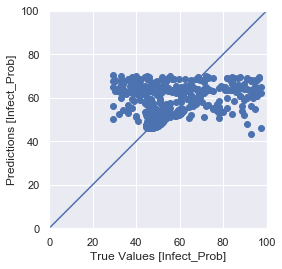

In [42]:
a = plt.axes(aspect='equal')
plt.scatter(y_test,y_pred)
plt.xlabel('True Values [Infect_Prob]')
plt.ylabel('Predictions [Infect_Prob]')
lims = [0, 100]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

In [43]:
y_pred.shape

(1918, 1)

In [44]:
answer=data_test['people_ID']
data_test=data_test.drop(['d-dimer','Heart rate','Platelets','Diuresis','FT/month','Region','people_ID'],axis=1)

In [45]:
data_test=pd.get_dummies(data_test,drop_first=True)
data_test=data_test.drop(['Children','Deaths/1M'],axis=1)

In [46]:
data_test.shape

(14498, 24)

In [47]:
data_test.columns.values

array(['Gender', 'cases/1M', 'Age', 'Coma score', 'Pulmonary score',
       'cardiological pressure', 'HBB', 'HDL cholesterol',
       'Charlson Index', 'Blood Glucose', 'Married_YES',
       'Occupation_Cleaner', 'Occupation_Clerk', 'Occupation_Driver',
       'Occupation_Farmer', 'Occupation_Legal',
       'Occupation_Manufacturing', 'Occupation_Researcher',
       'Occupation_Sales', 'Mode_transport_Public', 'Mode_transport_Walk',
       'comorbidity_Diabetes', 'comorbidity_Hypertension',
       'comorbidity_None'], dtype=object)

In [48]:
data_test.shape

(14498, 24)

In [49]:
X.columns.values

array(['Gender', 'cases/1M', 'Age', 'Coma score', 'Pulmonary score',
       'cardiological pressure', 'HBB', 'HDL cholesterol',
       'Charlson Index', 'Blood Glucose', 'Married_YES',
       'Occupation_Cleaner', 'Occupation_Clerk', 'Occupation_Driver',
       'Occupation_Farmer', 'Occupation_Legal',
       'Occupation_Manufacturing', 'Occupation_Researcher',
       'Occupation_Sales', 'Mode_transport_Public', 'Mode_transport_Walk',
       'comorbidity_Diabetes', 'comorbidity_Hypertension',
       'comorbidity_None'], dtype=object)

In [50]:
infect_pred=classifier.predict(data_test)

In [51]:
infect_pred=infect_pred/100

In [52]:
answer=pd.merge(answer,data_test,right_index=True,left_index=True)

In [53]:
answer.head()

,people_ID,Gender,cases/1M,Age,Coma score,Pulmonary score,cardiological pressure,HBB,HDL cholesterol,Charlson Index,...,Occupation_Farmer,Occupation_Legal,Occupation_Manufacturing,Occupation_Researcher,Occupation_Sales,Mode_transport_Public,Mode_transport_Walk,comorbidity_Diabetes,comorbidity_Hypertension,comorbidity_None
0,5942,1,4,52,3,200,4,196,53,17,...,0,0,0,0,0,1,0,1,0,0
1,18664,0,4,53,11,200,4,138,61,2,...,0,1,0,0,0,0,1,1,0,0
2,5603,1,4,35,9,100,6,166,47,24,...,0,0,0,0,1,0,0,1,0,0
3,5649,1,4,31,12,300,2,83,52,13,...,0,0,0,0,1,0,0,0,0,1
4,5099,1,4,51,6,200,4,207,68,39,...,0,0,0,0,0,0,0,1,0,0


In [54]:
infect=pd.DataFrame(infect_pred,columns=['Infect_prob'])

In [55]:
answer=pd.merge(answer,infect,right_index=True,left_index=True)

In [56]:
answer.head()

,people_ID,Gender,cases/1M,Age,Coma score,Pulmonary score,cardiological pressure,HBB,HDL cholesterol,Charlson Index,...,Occupation_Legal,Occupation_Manufacturing,Occupation_Researcher,Occupation_Sales,Mode_transport_Public,Mode_transport_Walk,comorbidity_Diabetes,comorbidity_Hypertension,comorbidity_None,Infect_prob
0,5942,1,4,52,3,200,4,196,53,17,...,0,0,0,0,1,0,1,0,0,26.258337
1,18664,0,4,53,11,200,4,138,61,2,...,1,0,0,0,0,1,1,0,0,30.955982
2,5603,1,4,35,9,100,6,166,47,24,...,0,0,0,1,0,0,1,0,0,9.337188
3,5649,1,4,31,12,300,2,83,52,13,...,0,0,0,1,0,0,0,0,1,64.403069
4,5099,1,4,51,6,200,4,207,68,39,...,0,0,0,0,0,0,1,0,0,26.959927


In [57]:
answer.columns.values

array(['people_ID', 'Gender', 'cases/1M', 'Age', 'Coma score',
       'Pulmonary score', 'cardiological pressure', 'HBB',
       'HDL cholesterol', 'Charlson Index', 'Blood Glucose',
       'Married_YES', 'Occupation_Cleaner', 'Occupation_Clerk',
       'Occupation_Driver', 'Occupation_Farmer', 'Occupation_Legal',
       'Occupation_Manufacturing', 'Occupation_Researcher',
       'Occupation_Sales', 'Mode_transport_Public', 'Mode_transport_Walk',
       'comorbidity_Diabetes', 'comorbidity_Hypertension',
       'comorbidity_None', 'Infect_prob'], dtype=object)

In [58]:
answer=answer.drop(['Gender', 'cases/1M', 'Age', 'Coma score',
       'Pulmonary score', 'cardiological pressure', 'HBB',
       'HDL cholesterol', 'Charlson Index', 'Blood Glucose',
       'Married_YES', 'Occupation_Cleaner', 'Occupation_Clerk',
       'Occupation_Driver', 'Occupation_Farmer', 'Occupation_Legal',
       'Occupation_Manufacturing', 'Occupation_Researcher',
       'Occupation_Sales', 'Mode_transport_Public', 'Mode_transport_Walk',
       'comorbidity_Diabetes', 'comorbidity_Hypertension',
       'comorbidity_None'],axis=1)

In [59]:
answer.head()

,people_ID,Infect_prob
0,5942,26.258337
1,18664,30.955982
2,5603,9.337188
3,5649,64.403069
4,5099,26.959927


In [60]:
answer.to_csv("flipr_ML_Solution_1.csv")